In [2]:
#x = [T_m, T_c]
#u = [Q_in, T_env]
#theta = [C_m, C_c, hA_m2c, hA_m2env, hA_eff, mda]

chp_air = 1000 
Q_HE = lambda x, u, theta: theta[5]*chp_air*(1-np.exp(-theta[4]/(theta[5]*chp_air)))*(x[1]-u[1])
dTm_dt = lambda x, u, theta: (u[0]-theta[2]*(x[0]-x[1])-theta[3]*(x[0]-u[1]))/theta[0]
dTc_dt = lambda x, u, theta: (theta[2]*(x[0]-x[1])-Q_HE(x,u,theta))/theta[1]

dxdt = lambda x,u,theta: np.array([dTm_dt(x,u,theta), dTc_dt(x,u,theta)])
f_x = lambda x,u,theta: np.array([Q_HE(x,u,theta)])

x0_range = [(20, 60), (20, 60)]
u_range = [(0, 30), (20, 30)]
theta_range = [(100, 800), (40, 400), (5,20), (0.1,1), (1,5), (0.3, 1.2)]

model = dynamical_model(dxdt, f_x)
model.setup(0, 60, 600, 20, x0_range, u_range, theta_range)

In [3]:
data_model = generate_data(model) 
X_NN, y_NN = data_model.load_data("Training_data/X_data.npy", "Training_data/y_data.npy") #Used to tune the scalers for the generators
#X_NN, y_NN = data_model.solve_N(2e5, "X_data.npy", "y_data.npy")
X_train, X_test, y_train, y_test, X_NN_scaled, y_NN_scaled = data_model.prepare_data(X_NN, y_NN) #Tune the data model

#Move Cm and Cc from y to X: 
# X_NN = np.append(X_NN.T, y_NN.T[:2], axis=0).T
# y_NN = y_NN[:,2:]

handler = handle_NNs(len(X_train[0,:]), len(y_train[0,:]), data_model)

In [8]:
best_model = handler.find_opt_hyperparams(X_train[0:20000], X_test[0:2000], y_train[0:20000], y_test[0:2000])

Epoch 1/2
625/625 - 2s - loss: 0.1069 - accuracy: 0.1717 - val_loss: 0.0834 - val_accuracy: 0.1710
Epoch 2/2
625/625 - 2s - loss: 0.0861 - accuracy: 0.1776 - val_loss: 0.0825 - val_accuracy: 0.1845


Epoch 1/2
625/625 - 2s - loss: 0.1151 - accuracy: 0.1672 - val_loss: 0.0835 - val_accuracy: 0.1690
Epoch 2/2
625/625 - 2s - loss: 0.0864 - accuracy: 0.1687 - val_loss: 0.0831 - val_accuracy: 0.1645


Epoch 1/2
625/625 - 4s - loss: 0.1082 - accuracy: 0.1653 - val_loss: 0.0852 - val_accuracy: 0.1760
Epoch 2/2
625/625 - 3s - loss: 0.0906 - accuracy: 0.1751 - val_loss: 0.0853 - val_accuracy: 0.1625


Epoch 1/2
625/625 - 6s - loss: 0.1043 - accuracy: 0.1656 - val_loss: 0.0845 - val_accuracy: 0.1805
Epoch 2/2
625/625 - 5s - loss: 0.0909 - accuracy: 0.1700 - val_loss: 0.0861 - val_accuracy: 0.1860


Epoch 1/2
625/625 - 1s - loss: 0.2107 - accuracy: 0.1641 - val_loss: 0.0986 - val_accuracy: 0.1645
Epoch 2/2
625/625 - 1s - loss: 0.1096 - accuracy: 0.1654 - val_loss: 0.0866 - val_accuracy: 0.1615


Epoch 3/5
625/625 - 1s - loss: 0.1078 - accuracy: 0.1675 - val_loss: 0.0845 - val_accuracy: 0.1790
Epoch 4/5
625/625 - 1s - loss: 0.0869 - accuracy: 0.1764 - val_loss: 0.0829 - val_accuracy: 0.1920
Epoch 5/5
625/625 - 1s - loss: 0.0847 - accuracy: 0.1768 - val_loss: 0.0826 - val_accuracy: 0.1905


Epoch 3/5
625/625 - 2s - loss: 0.1112 - accuracy: 0.1673 - val_loss: 0.0836 - val_accuracy: 0.1715
Epoch 4/5
625/625 - 1s - loss: 0.0866 - accuracy: 0.1674 - val_loss: 0.0831 - val_accuracy: 0.1735
Epoch 5/5
625/625 - 1s - loss: 0.0847 - accuracy: 0.1694 - val_loss: 0.0832 - val_accuracy: 0.1635


Epoch 1/5
625/625 - 1s - loss: 0.1131 - accuracy: 0.1716 - val_loss: 0.0848 - val_accuracy: 0.1855
Epoch 2/5
625/625 - 1s - loss: 0.0859 - accuracy: 0.1769 - val_loss: 0.0828 - val_accuracy: 0.1950
Epoch 3/5
625/625 - 1s - loss: 0.0849 - accuracy: 0.1785 - val_loss: 0.0826 - val_accuracy: 0.1785
Epoch 4/5
625/625 - 1s - loss: 0.0846 - accuracy: 0.1775 - val_loss: 0.0825 - val_accuracy: 0.2005
Epoch 5/5
625/625 - 1s - loss: 0.0842 - accuracy: 0.1803 - val_loss: 0.0825 - val_accuracy: 0.1915


Epoch 1/5
625/625 - 3s - loss: 0.1014 - accuracy: 0.1658 - val_loss: 0.0831 - val_accuracy: 0.1700
Epoch 2/5
625/625 - 2s - loss: 0.0859 - accuracy: 0.1664 - val_loss: 0.0832 - val_accuracy: 0.1640
Epoch 3/5
625/625 - 2s - loss: 0.0847 - accuracy: 0.1726 - val_loss: 0.0830 - val_accuracy: 0.1630
Epoch 4/5
625/625 - 2s - loss: 0.0841 - accuracy: 0.1748 - val_loss: 0.0831 - val_accuracy: 0.1675
Epoch 5/5
625/625 - 2s - loss: 0.0835 - accuracy: 0.1906 - val_loss: 0.0819 - val_accuracy: 0.2005


Epoch 1/5
625/625 - 1s - loss: 0.0930 - accuracy: 0.1725 - val_loss: 0.0831 - val_accuracy: 0.1875
Epoch 2/5
625/625 - 1s - loss: 0.0850 - accuracy: 0.1787 - val_loss: 0.0821 - val_accuracy: 0.1980
Epoch 3/5
625/625 - 1s - loss: 0.0835 - accuracy: 0.1972 - val_loss: 0.0809 - val_accuracy: 0.2310
Epoch 4/5
625/625 - 1s - loss: 0.0818 - accuracy: 0.2273 - val_loss: 0.0795 - val_accuracy: 0.2580
Epoch 5/5
625/625 - 1s - loss: 0.0806 - accuracy: 0.2405 - val_loss: 0.0793 - val_accuracy: 0.2430


INFO:tensorflow:Oracle triggered exit
Tiden for denne kommandoen var: 1.37 min
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer_1 (Dense)              (None, 110)               770       
_________________________________________________________________
Dropout_1 (Dropout)          (None, 110)               0         
_________________________________________________________________
Layer_2 (Dense)              (None, 75)                8325      
_________________________________________________________________
Dropout_2 (Dropout)          (None, 75)                0         
_________________________________________________________________
Layer_3 (Dense)              (None, 40)                3040      
_________________________________________________________________
Dropout_3 (Dropout)          (None, 40)                0         
___________________________________________

In [9]:
#X_NN, y_NN = data_model.load_data("Training_data/X_data.npy", "Training_data/y_data.npy") #Used to tune the scalers for the generators
#X_train, X_test, y_train, y_test, X_NN_scaled, y_NN_scaled = data_model.prepare_data(X_NN, y_NN) #Tune the data model
gen_train = data_model.generator(batch_size=32)
#gen_val = data_model.generator(X_NN, y_NN)
history = best_model.fit_generator(gen_train, steps_per_epoch=10000//32, epochs=20, validation_data=(X_test[0:10000], y_test[0:10000]),
                                   callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])


Epoch 1/20


185/312 [================>.............] - ETA: 0s - loss: 0.3346 - accuracy: 0.0000e+ - ETA: 4:20 - loss: 0.3320 - accuracy: 0.0000e+ - ETA: 6:34 - loss: 0.3229 - accuracy: 0.0312   - ETA: 7:23 - loss: 0.3136 - accuracy: 0.03 - ETA: 7:37 - loss: 0.3018 - accuracy: 0.04 - ETA: 7:54 - loss: 0.2889 - accuracy: 0.05 - ETA: 8:15 - loss: 0.2758 - accuracy: 0.08 - ETA: 8:08 - loss: 0.2636 - accuracy: 0.08 - ETA: 8:16 - loss: 0.2510 - accuracy: 0.08 - ETA: 8:14 - loss: 0.2388 - accuracy: 0.09 - ETA: 8:12 - loss: 0.2269 - accuracy: 0.09 - ETA: 8:15 - loss: 0.2162 - accuracy: 0.09 - ETA: 8:16 - loss: 0.2073 - accuracy: 0.09 - ETA: 8:14 - loss: 0.1982 - accuracy: 0.09 - ETA: 8:16 - loss: 0.1902 - accuracy: 0.09 - ETA: 8:16 - loss: 0.1825 - accuracy: 0.09 - ETA: 8:14 - loss: 0.1753 - accuracy: 0.10 - ETA: 8:12 - loss: 0.1686 - accuracy: 0.12 - ETA: 8:12 - loss: 0.1623 - accuracy: 0.16 - ETA: 8:09 - loss: 0.1567 - accuracy: 0.19 - ETA: 8:06 - loss: 0.1519 - accuracy: 0.21 - ETA: 8:08 - loss: 0.147

312/312 [==============================] - ETA: 3:58 - loss: 0.0283 - accuracy: 0.74 - ETA: 3:56 - loss: 0.0282 - accuracy: 0.75 - ETA: 3:54 - loss: 0.0281 - accuracy: 0.75 - ETA: 3:51 - loss: 0.0279 - accuracy: 0.75 - ETA: 3:49 - loss: 0.0278 - accuracy: 0.75 - ETA: 3:47 - loss: 0.0277 - accuracy: 0.75 - ETA: 3:46 - loss: 0.0276 - accuracy: 0.75 - ETA: 3:44 - loss: 0.0275 - accuracy: 0.75 - ETA: 3:42 - loss: 0.0274 - accuracy: 0.75 - ETA: 3:40 - loss: 0.0273 - accuracy: 0.75 - ETA: 3:38 - loss: 0.0271 - accuracy: 0.75 - ETA: 3:37 - loss: 0.0270 - accuracy: 0.75 - ETA: 3:35 - loss: 0.0269 - accuracy: 0.75 - ETA: 3:33 - loss: 0.0268 - accuracy: 0.75 - ETA: 3:31 - loss: 0.0267 - accuracy: 0.76 - ETA: 3:29 - loss: 0.0266 - accuracy: 0.76 - ETA: 3:28 - loss: 0.0265 - accuracy: 0.76 - ETA: 3:26 - loss: 0.0263 - accuracy: 0.76 - ETA: 3:25 - loss: 0.0262 - accuracy: 0.76 - ETA: 3:23 - loss: 0.0261 - accuracy: 0.76 - ETA: 3:21 - loss: 0.0260 - accuracy: 0.76 - ETA: 3:19 - loss: 0.0259 - accura

KeyboardInterrupt: 

In [10]:
hist = history.history 
fig, axes = plt.subplots(len(hist), 1)
for el, ax in zip(hist, axes): 
    ax.plot(hist[el])
    ax.set_title(el)
    
fig.set_figheight(6)
fig.set_figwidth(10)
fig.tight_layout(h_pad=-0.2)
plt.show()    

NameError: name 'history' is not defined

In [5]:
# pickle.dump(model, open("dyn_model.pickle", "wb"))
# pickle.dump(data_model, open("data_model.pickle", "wb"))
#best_model.save("best_model")
best_model = keras.models.load_model("best_model")

In [11]:
from evaluate_NN import TestNN 
test = TestNN(best_model, model, data_model)

In [19]:
y_NN, y_pred = test.find_theta_one()

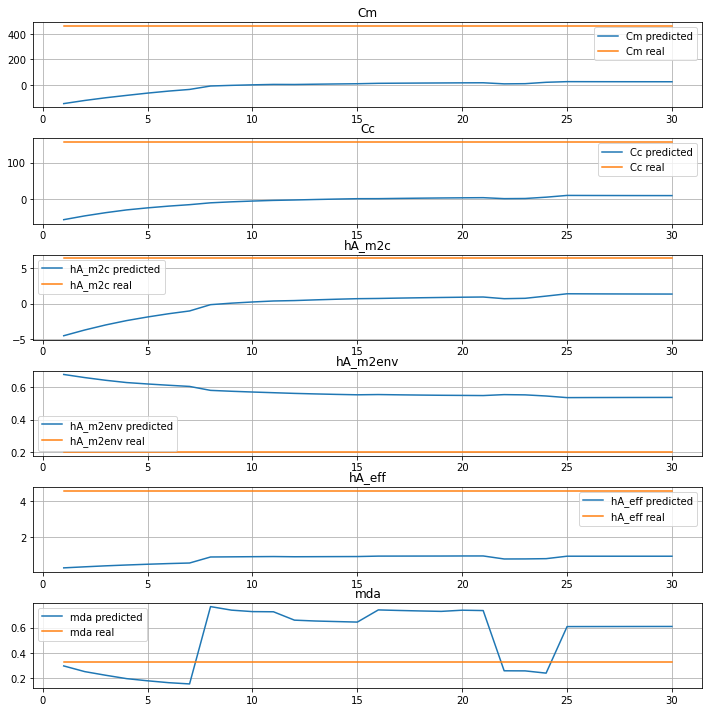

In [20]:
fig, axes = plt.subplots(len(y_NN[0]))
names = ["Cm", "Cc", "hA_m2c", "hA_m2env", "hA_eff", "mda"]
n_steps = np.linspace(1, len(y_pred), len(y_pred))
y_pred_plot = data_model.y_scaler.inverse_transform(y_pred)
for ax, name, th_pred, th_real in zip(axes, names, y_pred_plot.T, y_NN.T):
    ax.set_title(name)
    ax.plot(n_steps, th_pred, label=name+" predicted")
    ax.plot(n_steps, th_real, label=name+" real")
    ax.legend() 
    ax.grid()
    
fig.set_figwidth(10)
fig.set_figheight(10)
fig.tight_layout(h_pad=-0.2)

In [16]:
model.N_steps

2

# Testing! 


In [1]:
from data_and_models import *
import numpy as np
import time
from tensorflow import keras 

In [2]:
chp_air = 1000 
Q_HE = lambda x, u, theta: theta[5]*chp_air*(1-np.exp(-theta[4]/(theta[5]*chp_air)))*(x[1]-u[1])
dTm_dt = lambda x, u, theta: (u[0]-theta[2]*(x[0]-x[1])-theta[3]*(x[0]-u[1]))/theta[0]
dTc_dt = lambda x, u, theta: (theta[2]*(x[0]-x[1])-Q_HE(x,u,theta))/theta[1]

dxdt = lambda x,u,theta: np.array([dTm_dt(x,u,theta), dTc_dt(x,u,theta)])
f_x = lambda x,u,theta: np.array([Q_HE(x,u,theta)])

x0_range = [(20, 60), (20, 60)]
u_range = [(0, 30), (20, 30)]
theta_range = [(100, 800), (40, 400), (5,20), (0.1,1), (1,5), (0.3, 1.2)]

model = dynamical_model(dxdt, f_x)
model.setup(0, 60, 600, 20, x0_range, u_range, theta_range)
data_model = generate_data(model) 
X_NN, y_NN = data_model.load_data("Training_data/X_data.npy", "Training_data/y_data.npy") #could also generate data 

In [3]:
X_train, X_test, y_train, y_test, X_NN_scaled, y_NN_scaled = data_model.prepare_data(X_NN, y_NN)
train_gen = data_model.generator(batch_size=32)
test_gen = data_model.generator(batch_size=32)

In [4]:
NN_model = keras.Sequential()
NN_model.add(keras.Input(shape=(6,), name="Input_Layer")) 
NN_model.add(keras.layers.Dense(200, activation='relu', name=f"Layer_{1}"))
NN_model.add(keras.layers.Dense(6, name="Output_Layer"))
NN_model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='mse', metrics=['accuracy'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer_1 (Dense)              (None, 200)               1400      
_________________________________________________________________
Output_Layer (Dense)         (None, 6)                 1206      
Total params: 2,606
Trainable params: 2,606
Non-trainable params: 0
_________________________________________________________________


In [19]:
#history = NN_model.fit_generator(train_gen, steps_per_epoch=96//32, epochs=10, validation_data=(X_train[0:1000], y_train[0:1000]))
history = NN_model.fit(X_test, y_test, epochs=10, validation_data=(X_train[0:100], y_train[0:100]))


Epoch 1/10


2908/6251 [============>.................] - ETA: 0s - loss: 0.3922 - accuracy: 0.21 - ETA: 12s - loss: 0.1888 - accuracy: 0.179 - ETA: 21s - loss: 0.1756 - accuracy: 0.168 - ETA: 18s - loss: 0.1434 - accuracy: 0.173 - ETA: 21s - loss: 0.1341 - accuracy: 0.170 - ETA: 23s - loss: 0.1291 - accuracy: 0.172 - ETA: 21s - loss: 0.1191 - accuracy: 0.171 - ETA: 23s - loss: 0.1175 - accuracy: 0.171 - ETA: 25s - loss: 0.1148 - accuracy: 0.173 - ETA: 23s - loss: 0.1095 - accuracy: 0.171 - ETA: 23s - loss: 0.1068 - accuracy: 0.173 - ETA: 23s - loss: 0.1046 - accuracy: 0.172 - ETA: 22s - loss: 0.1021 - accuracy: 0.174 - ETA: 22s - loss: 0.1012 - accuracy: 0.174 - ETA: 22s - loss: 0.1000 - accuracy: 0.173 - ETA: 21s - loss: 0.0984 - accuracy: 0.173 - ETA: 22s - loss: 0.0980 - accuracy: 0.173 - ETA: 22s - loss: 0.0973 - accuracy: 0.173 - ETA: 21s - loss: 0.0959 - accuracy: 0.175 - ETA: 21s - loss: 0.0953 - accuracy: 0.176 - ETA: 22s - loss: 0.0948 - accuracy: 0.176 - ETA: 21s - loss: 0.0939 - accurac

5790/6251 [==========================>...] - ETA: 11s - loss: 0.0836 - accuracy: 0.201 - ETA: 11s - loss: 0.0836 - accuracy: 0.201 - ETA: 11s - loss: 0.0836 - accuracy: 0.201 - ETA: 11s - loss: 0.0836 - accuracy: 0.201 - ETA: 11s - loss: 0.0836 - accuracy: 0.201 - ETA: 11s - loss: 0.0836 - accuracy: 0.201 - ETA: 11s - loss: 0.0836 - accuracy: 0.201 - ETA: 11s - loss: 0.0836 - accuracy: 0.201 - ETA: 10s - loss: 0.0835 - accuracy: 0.201 - ETA: 10s - loss: 0.0835 - accuracy: 0.201 - ETA: 10s - loss: 0.0835 - accuracy: 0.202 - ETA: 10s - loss: 0.0835 - accuracy: 0.202 - ETA: 10s - loss: 0.0835 - accuracy: 0.202 - ETA: 10s - loss: 0.0835 - accuracy: 0.202 - ETA: 10s - loss: 0.0835 - accuracy: 0.202 - ETA: 10s - loss: 0.0835 - accuracy: 0.202 - ETA: 10s - loss: 0.0834 - accuracy: 0.202 - ETA: 10s - loss: 0.0834 - accuracy: 0.203 - ETA: 10s - loss: 0.0834 - accuracy: 0.203 - ETA: 10s - loss: 0.0834 - accuracy: 0.203 - ETA: 10s - loss: 0.0834 - accuracy: 0.203 - ETA: 10s - loss: 0.0834 - accur

6251/6251 [==============================] - ETA: 1s - loss: 0.0819 - accuracy: 0.22 - ETA: 1s - loss: 0.0819 - accuracy: 0.22 - ETA: 1s - loss: 0.0819 - accuracy: 0.22 - ETA: 1s - loss: 0.0819 - accuracy: 0.22 - ETA: 1s - loss: 0.0819 - accuracy: 0.22 - ETA: 1s - loss: 0.0819 - accuracy: 0.22 - ETA: 1s - loss: 0.0819 - accuracy: 0.22 - ETA: 1s - loss: 0.0818 - accuracy: 0.22 - ETA: 1s - loss: 0.0818 - accuracy: 0.22 - ETA: 1s - loss: 0.0818 - accuracy: 0.22 - ETA: 0s - loss: 0.0818 - accuracy: 0.22 - ETA: 0s - loss: 0.0818 - accuracy: 0.22 - ETA: 0s - loss: 0.0818 - accuracy: 0.22 - ETA: 0s - loss: 0.0818 - accuracy: 0.22 - ETA: 0s - loss: 0.0818 - accuracy: 0.22 - ETA: 0s - loss: 0.0818 - accuracy: 0.22 - ETA: 0s - loss: 0.0818 - accuracy: 0.22 - ETA: 0s - loss: 0.0818 - accuracy: 0.22 - ETA: 0s - loss: 0.0818 - accuracy: 0.22 - ETA: 0s - loss: 0.0818 - accuracy: 0.22 - ETA: 0s - loss: 0.0818 - accuracy: 0.22 - ETA: 0s - loss: 0.0818 - accuracy: 0.22 - ETA: 0s - loss: 0.0818 - accura

2686/6251 [===========>..................] - ETA: 0s - loss: 0.0726 - accuracy: 0.21 - ETA: 18s - loss: 0.0792 - accuracy: 0.268 - ETA: 17s - loss: 0.0791 - accuracy: 0.270 - ETA: 14s - loss: 0.0786 - accuracy: 0.265 - ETA: 17s - loss: 0.0786 - accuracy: 0.263 - ETA: 20s - loss: 0.0788 - accuracy: 0.266 - ETA: 18s - loss: 0.0783 - accuracy: 0.269 - ETA: 19s - loss: 0.0786 - accuracy: 0.268 - ETA: 20s - loss: 0.0784 - accuracy: 0.267 - ETA: 19s - loss: 0.0780 - accuracy: 0.267 - ETA: 20s - loss: 0.0780 - accuracy: 0.266 - ETA: 21s - loss: 0.0780 - accuracy: 0.264 - ETA: 19s - loss: 0.0783 - accuracy: 0.263 - ETA: 20s - loss: 0.0784 - accuracy: 0.263 - ETA: 21s - loss: 0.0782 - accuracy: 0.264 - ETA: 20s - loss: 0.0781 - accuracy: 0.265 - ETA: 21s - loss: 0.0780 - accuracy: 0.264 - ETA: 21s - loss: 0.0780 - accuracy: 0.264 - ETA: 20s - loss: 0.0782 - accuracy: 0.264 - ETA: 21s - loss: 0.0783 - accuracy: 0.263 - ETA: 21s - loss: 0.0783 - accuracy: 0.265 - ETA: 20s - loss: 0.0783 - accurac

4924/6251 [======================>.......] - ETA: 13s - loss: 0.0781 - accuracy: 0.267 - ETA: 13s - loss: 0.0781 - accuracy: 0.267 - ETA: 13s - loss: 0.0780 - accuracy: 0.267 - ETA: 13s - loss: 0.0780 - accuracy: 0.267 - ETA: 12s - loss: 0.0780 - accuracy: 0.267 - ETA: 12s - loss: 0.0780 - accuracy: 0.267 - ETA: 12s - loss: 0.0780 - accuracy: 0.267 - ETA: 12s - loss: 0.0780 - accuracy: 0.267 - ETA: 12s - loss: 0.0780 - accuracy: 0.267 - ETA: 12s - loss: 0.0780 - accuracy: 0.267 - ETA: 12s - loss: 0.0780 - accuracy: 0.267 - ETA: 12s - loss: 0.0780 - accuracy: 0.267 - ETA: 12s - loss: 0.0780 - accuracy: 0.268 - ETA: 12s - loss: 0.0780 - accuracy: 0.268 - ETA: 12s - loss: 0.0780 - accuracy: 0.268 - ETA: 12s - loss: 0.0780 - accuracy: 0.268 - ETA: 12s - loss: 0.0780 - accuracy: 0.268 - ETA: 12s - loss: 0.0780 - accuracy: 0.268 - ETA: 12s - loss: 0.0780 - accuracy: 0.268 - ETA: 12s - loss: 0.0780 - accuracy: 0.268 - ETA: 12s - loss: 0.0780 - accuracy: 0.268 - ETA: 12s - loss: 0.0780 - accur

6251/6251 [==============================] - ETA: 5s - loss: 0.0776 - accuracy: 0.26 - ETA: 5s - loss: 0.0776 - accuracy: 0.26 - ETA: 5s - loss: 0.0777 - accuracy: 0.26 - ETA: 5s - loss: 0.0777 - accuracy: 0.26 - ETA: 5s - loss: 0.0777 - accuracy: 0.26 - ETA: 4s - loss: 0.0776 - accuracy: 0.26 - ETA: 4s - loss: 0.0777 - accuracy: 0.27 - ETA: 4s - loss: 0.0777 - accuracy: 0.27 - ETA: 4s - loss: 0.0777 - accuracy: 0.27 - ETA: 3s - loss: 0.0776 - accuracy: 0.27 - ETA: 3s - loss: 0.0776 - accuracy: 0.27 - ETA: 3s - loss: 0.0776 - accuracy: 0.27 - ETA: 3s - loss: 0.0776 - accuracy: 0.27 - ETA: 3s - loss: 0.0776 - accuracy: 0.27 - ETA: 3s - loss: 0.0776 - accuracy: 0.27 - ETA: 3s - loss: 0.0776 - accuracy: 0.27 - ETA: 3s - loss: 0.0776 - accuracy: 0.27 - ETA: 3s - loss: 0.0776 - accuracy: 0.27 - ETA: 3s - loss: 0.0776 - accuracy: 0.27 - ETA: 3s - loss: 0.0776 - accuracy: 0.27 - ETA: 3s - loss: 0.0776 - accuracy: 0.27 - ETA: 3s - loss: 0.0776 - accuracy: 0.27 - ETA: 3s - loss: 0.0776 - accura

4412/6251 [====================>.........] - ETA: 0s - loss: 0.0836 - accuracy: 0.37 - ETA: 12s - loss: 0.0772 - accuracy: 0.266 - ETA: 13s - loss: 0.0764 - accuracy: 0.271 - ETA: 15s - loss: 0.0758 - accuracy: 0.270 - ETA: 16s - loss: 0.0758 - accuracy: 0.279 - ETA: 16s - loss: 0.0760 - accuracy: 0.277 - ETA: 16s - loss: 0.0763 - accuracy: 0.275 - ETA: 17s - loss: 0.0763 - accuracy: 0.272 - ETA: 17s - loss: 0.0765 - accuracy: 0.272 - ETA: 16s - loss: 0.0767 - accuracy: 0.275 - ETA: 15s - loss: 0.0767 - accuracy: 0.274 - ETA: 15s - loss: 0.0769 - accuracy: 0.275 - ETA: 15s - loss: 0.0769 - accuracy: 0.276 - ETA: 14s - loss: 0.0767 - accuracy: 0.275 - ETA: 14s - loss: 0.0766 - accuracy: 0.276 - ETA: 14s - loss: 0.0767 - accuracy: 0.279 - ETA: 13s - loss: 0.0768 - accuracy: 0.279 - ETA: 13s - loss: 0.0768 - accuracy: 0.279 - ETA: 13s - loss: 0.0768 - accuracy: 0.278 - ETA: 13s - loss: 0.0768 - accuracy: 0.279 - ETA: 13s - loss: 0.0768 - accuracy: 0.278 - ETA: 13s - loss: 0.0768 - accurac

6251/6251 [==============================] - ETA: 4s - loss: 0.0761 - accuracy: 0.28 - ETA: 3s - loss: 0.0761 - accuracy: 0.28 - ETA: 3s - loss: 0.0761 - accuracy: 0.28 - ETA: 3s - loss: 0.0761 - accuracy: 0.28 - ETA: 3s - loss: 0.0761 - accuracy: 0.28 - ETA: 3s - loss: 0.0761 - accuracy: 0.28 - ETA: 3s - loss: 0.0761 - accuracy: 0.28 - ETA: 3s - loss: 0.0761 - accuracy: 0.28 - ETA: 3s - loss: 0.0761 - accuracy: 0.28 - ETA: 3s - loss: 0.0761 - accuracy: 0.28 - ETA: 3s - loss: 0.0761 - accuracy: 0.28 - ETA: 3s - loss: 0.0761 - accuracy: 0.28 - ETA: 3s - loss: 0.0761 - accuracy: 0.28 - ETA: 3s - loss: 0.0761 - accuracy: 0.28 - ETA: 3s - loss: 0.0761 - accuracy: 0.28 - ETA: 3s - loss: 0.0761 - accuracy: 0.28 - ETA: 2s - loss: 0.0761 - accuracy: 0.28 - ETA: 2s - loss: 0.0761 - accuracy: 0.28 - ETA: 2s - loss: 0.0761 - accuracy: 0.28 - ETA: 2s - loss: 0.0761 - accuracy: 0.28 - ETA: 2s - loss: 0.0761 - accuracy: 0.28 - ETA: 2s - loss: 0.0761 - accuracy: 0.28 - ETA: 2s - loss: 0.0761 - accura

4471/6251 [====================>.........] - ETA: 0s - loss: 0.0846 - accuracy: 0.34 - ETA: 10s - loss: 0.0773 - accuracy: 0.288 - ETA: 12s - loss: 0.0762 - accuracy: 0.286 - ETA: 14s - loss: 0.0756 - accuracy: 0.290 - ETA: 14s - loss: 0.0753 - accuracy: 0.290 - ETA: 14s - loss: 0.0754 - accuracy: 0.286 - ETA: 13s - loss: 0.0753 - accuracy: 0.288 - ETA: 14s - loss: 0.0752 - accuracy: 0.290 - ETA: 15s - loss: 0.0753 - accuracy: 0.286 - ETA: 15s - loss: 0.0753 - accuracy: 0.286 - ETA: 15s - loss: 0.0753 - accuracy: 0.286 - ETA: 15s - loss: 0.0752 - accuracy: 0.284 - ETA: 14s - loss: 0.0752 - accuracy: 0.285 - ETA: 14s - loss: 0.0755 - accuracy: 0.285 - ETA: 14s - loss: 0.0753 - accuracy: 0.284 - ETA: 14s - loss: 0.0753 - accuracy: 0.285 - ETA: 13s - loss: 0.0753 - accuracy: 0.284 - ETA: 13s - loss: 0.0753 - accuracy: 0.284 - ETA: 13s - loss: 0.0753 - accuracy: 0.284 - ETA: 13s - loss: 0.0752 - accuracy: 0.284 - ETA: 12s - loss: 0.0752 - accuracy: 0.285 - ETA: 13s - loss: 0.0752 - accurac

6251/6251 [==============================] - ETA: 3s - loss: 0.0751 - accuracy: 0.28 - ETA: 3s - loss: 0.0751 - accuracy: 0.28 - ETA: 3s - loss: 0.0751 - accuracy: 0.28 - ETA: 3s - loss: 0.0751 - accuracy: 0.28 - ETA: 3s - loss: 0.0751 - accuracy: 0.28 - ETA: 3s - loss: 0.0751 - accuracy: 0.28 - ETA: 3s - loss: 0.0751 - accuracy: 0.28 - ETA: 3s - loss: 0.0751 - accuracy: 0.28 - ETA: 3s - loss: 0.0751 - accuracy: 0.28 - ETA: 3s - loss: 0.0751 - accuracy: 0.28 - ETA: 3s - loss: 0.0751 - accuracy: 0.28 - ETA: 3s - loss: 0.0751 - accuracy: 0.28 - ETA: 3s - loss: 0.0751 - accuracy: 0.28 - ETA: 3s - loss: 0.0751 - accuracy: 0.28 - ETA: 3s - loss: 0.0751 - accuracy: 0.28 - ETA: 2s - loss: 0.0751 - accuracy: 0.28 - ETA: 2s - loss: 0.0751 - accuracy: 0.28 - ETA: 2s - loss: 0.0751 - accuracy: 0.28 - ETA: 2s - loss: 0.0751 - accuracy: 0.28 - ETA: 2s - loss: 0.0751 - accuracy: 0.28 - ETA: 2s - loss: 0.0751 - accuracy: 0.28 - ETA: 2s - loss: 0.0751 - accuracy: 0.28 - ETA: 2s - loss: 0.0751 - accura

3843/6251 [=================>............] - ETA: 0s - loss: 0.0743 - accuracy: 0.31 - ETA: 12s - loss: 0.0739 - accuracy: 0.289 - ETA: 12s - loss: 0.0741 - accuracy: 0.291 - ETA: 13s - loss: 0.0742 - accuracy: 0.290 - ETA: 13s - loss: 0.0744 - accuracy: 0.292 - ETA: 13s - loss: 0.0747 - accuracy: 0.287 - ETA: 13s - loss: 0.0746 - accuracy: 0.288 - ETA: 13s - loss: 0.0747 - accuracy: 0.292 - ETA: 13s - loss: 0.0746 - accuracy: 0.293 - ETA: 13s - loss: 0.0746 - accuracy: 0.289 - ETA: 12s - loss: 0.0748 - accuracy: 0.288 - ETA: 12s - loss: 0.0748 - accuracy: 0.286 - ETA: 12s - loss: 0.0746 - accuracy: 0.288 - ETA: 12s - loss: 0.0745 - accuracy: 0.290 - ETA: 12s - loss: 0.0744 - accuracy: 0.292 - ETA: 12s - loss: 0.0744 - accuracy: 0.292 - ETA: 12s - loss: 0.0745 - accuracy: 0.293 - ETA: 12s - loss: 0.0744 - accuracy: 0.292 - ETA: 12s - loss: 0.0744 - accuracy: 0.292 - ETA: 12s - loss: 0.0744 - accuracy: 0.292 - ETA: 12s - loss: 0.0745 - accuracy: 0.291 - ETA: 12s - loss: 0.0744 - accurac

6251/6251 [==============================] - ETA: 6s - loss: 0.0742 - accuracy: 0.29 - ETA: 6s - loss: 0.0742 - accuracy: 0.29 - ETA: 6s - loss: 0.0742 - accuracy: 0.29 - ETA: 5s - loss: 0.0742 - accuracy: 0.29 - ETA: 5s - loss: 0.0742 - accuracy: 0.29 - ETA: 5s - loss: 0.0742 - accuracy: 0.29 - ETA: 5s - loss: 0.0742 - accuracy: 0.29 - ETA: 5s - loss: 0.0742 - accuracy: 0.29 - ETA: 5s - loss: 0.0742 - accuracy: 0.29 - ETA: 5s - loss: 0.0742 - accuracy: 0.29 - ETA: 5s - loss: 0.0742 - accuracy: 0.29 - ETA: 5s - loss: 0.0742 - accuracy: 0.29 - ETA: 5s - loss: 0.0742 - accuracy: 0.29 - ETA: 5s - loss: 0.0742 - accuracy: 0.29 - ETA: 5s - loss: 0.0742 - accuracy: 0.29 - ETA: 5s - loss: 0.0742 - accuracy: 0.29 - ETA: 5s - loss: 0.0742 - accuracy: 0.29 - ETA: 5s - loss: 0.0742 - accuracy: 0.29 - ETA: 5s - loss: 0.0742 - accuracy: 0.29 - ETA: 5s - loss: 0.0742 - accuracy: 0.29 - ETA: 5s - loss: 0.0742 - accuracy: 0.29 - ETA: 5s - loss: 0.0742 - accuracy: 0.29 - ETA: 5s - loss: 0.0742 - accura

4610/6251 [=====================>........] - ETA: 0s - loss: 0.0693 - accuracy: 0.28 - ETA: 13s - loss: 0.0744 - accuracy: 0.263 - ETA: 13s - loss: 0.0743 - accuracy: 0.279 - ETA: 14s - loss: 0.0744 - accuracy: 0.285 - ETA: 14s - loss: 0.0742 - accuracy: 0.287 - ETA: 14s - loss: 0.0747 - accuracy: 0.289 - ETA: 14s - loss: 0.0743 - accuracy: 0.287 - ETA: 14s - loss: 0.0742 - accuracy: 0.290 - ETA: 14s - loss: 0.0741 - accuracy: 0.291 - ETA: 14s - loss: 0.0742 - accuracy: 0.292 - ETA: 14s - loss: 0.0743 - accuracy: 0.295 - ETA: 14s - loss: 0.0743 - accuracy: 0.295 - ETA: 13s - loss: 0.0743 - accuracy: 0.296 - ETA: 13s - loss: 0.0742 - accuracy: 0.299 - ETA: 13s - loss: 0.0742 - accuracy: 0.300 - ETA: 13s - loss: 0.0742 - accuracy: 0.299 - ETA: 13s - loss: 0.0742 - accuracy: 0.301 - ETA: 14s - loss: 0.0742 - accuracy: 0.302 - ETA: 14s - loss: 0.0742 - accuracy: 0.303 - ETA: 13s - loss: 0.0741 - accuracy: 0.303 - ETA: 13s - loss: 0.0741 - accuracy: 0.302 - ETA: 13s - loss: 0.0741 - accurac

6251/6251 [==============================] - ETA: 3s - loss: 0.0732 - accuracy: 0.30 - ETA: 3s - loss: 0.0732 - accuracy: 0.30 - ETA: 3s - loss: 0.0732 - accuracy: 0.30 - ETA: 3s - loss: 0.0732 - accuracy: 0.30 - ETA: 3s - loss: 0.0732 - accuracy: 0.30 - ETA: 3s - loss: 0.0732 - accuracy: 0.30 - ETA: 3s - loss: 0.0732 - accuracy: 0.30 - ETA: 3s - loss: 0.0732 - accuracy: 0.30 - ETA: 3s - loss: 0.0732 - accuracy: 0.30 - ETA: 2s - loss: 0.0732 - accuracy: 0.30 - ETA: 2s - loss: 0.0732 - accuracy: 0.30 - ETA: 2s - loss: 0.0732 - accuracy: 0.30 - ETA: 2s - loss: 0.0732 - accuracy: 0.30 - ETA: 2s - loss: 0.0732 - accuracy: 0.30 - ETA: 2s - loss: 0.0732 - accuracy: 0.30 - ETA: 2s - loss: 0.0732 - accuracy: 0.30 - ETA: 2s - loss: 0.0732 - accuracy: 0.30 - ETA: 2s - loss: 0.0732 - accuracy: 0.30 - ETA: 2s - loss: 0.0732 - accuracy: 0.30 - ETA: 2s - loss: 0.0732 - accuracy: 0.30 - ETA: 2s - loss: 0.0732 - accuracy: 0.30 - ETA: 2s - loss: 0.0732 - accuracy: 0.30 - ETA: 2s - loss: 0.0732 - accura

4460/6251 [====================>.........] - ETA: 0s - loss: 0.0764 - accuracy: 0.25 - ETA: 12s - loss: 0.0729 - accuracy: 0.287 - ETA: 13s - loss: 0.0727 - accuracy: 0.299 - ETA: 13s - loss: 0.0721 - accuracy: 0.305 - ETA: 12s - loss: 0.0722 - accuracy: 0.308 - ETA: 11s - loss: 0.0726 - accuracy: 0.300 - ETA: 11s - loss: 0.0724 - accuracy: 0.303 - ETA: 11s - loss: 0.0724 - accuracy: 0.306 - ETA: 11s - loss: 0.0726 - accuracy: 0.303 - ETA: 11s - loss: 0.0727 - accuracy: 0.302 - ETA: 11s - loss: 0.0727 - accuracy: 0.303 - ETA: 11s - loss: 0.0726 - accuracy: 0.303 - ETA: 11s - loss: 0.0727 - accuracy: 0.302 - ETA: 11s - loss: 0.0726 - accuracy: 0.303 - ETA: 11s - loss: 0.0725 - accuracy: 0.303 - ETA: 11s - loss: 0.0726 - accuracy: 0.302 - ETA: 11s - loss: 0.0725 - accuracy: 0.304 - ETA: 11s - loss: 0.0723 - accuracy: 0.304 - ETA: 11s - loss: 0.0723 - accuracy: 0.304 - ETA: 11s - loss: 0.0724 - accuracy: 0.304 - ETA: 11s - loss: 0.0725 - accuracy: 0.304 - ETA: 12s - loss: 0.0725 - accurac

6251/6251 [==============================] - ETA: 3s - loss: 0.0722 - accuracy: 0.31 - ETA: 3s - loss: 0.0722 - accuracy: 0.31 - ETA: 3s - loss: 0.0722 - accuracy: 0.31 - ETA: 3s - loss: 0.0722 - accuracy: 0.31 - ETA: 3s - loss: 0.0722 - accuracy: 0.31 - ETA: 3s - loss: 0.0722 - accuracy: 0.31 - ETA: 3s - loss: 0.0721 - accuracy: 0.31 - ETA: 3s - loss: 0.0721 - accuracy: 0.31 - ETA: 3s - loss: 0.0721 - accuracy: 0.31 - ETA: 3s - loss: 0.0721 - accuracy: 0.31 - ETA: 3s - loss: 0.0721 - accuracy: 0.31 - ETA: 3s - loss: 0.0721 - accuracy: 0.31 - ETA: 3s - loss: 0.0721 - accuracy: 0.31 - ETA: 3s - loss: 0.0721 - accuracy: 0.31 - ETA: 3s - loss: 0.0721 - accuracy: 0.31 - ETA: 3s - loss: 0.0721 - accuracy: 0.31 - ETA: 2s - loss: 0.0721 - accuracy: 0.31 - ETA: 2s - loss: 0.0721 - accuracy: 0.31 - ETA: 2s - loss: 0.0721 - accuracy: 0.31 - ETA: 2s - loss: 0.0721 - accuracy: 0.31 - ETA: 2s - loss: 0.0721 - accuracy: 0.31 - ETA: 2s - loss: 0.0721 - accuracy: 0.31 - ETA: 2s - loss: 0.0721 - accura

2027/6251 [========>.....................] - ETA: 0s - loss: 0.0678 - accuracy: 0.28 - ETA: 19s - loss: 0.0724 - accuracy: 0.308 - ETA: 19s - loss: 0.0714 - accuracy: 0.300 - ETA: 19s - loss: 0.0707 - accuracy: 0.303 - ETA: 21s - loss: 0.0708 - accuracy: 0.305 - ETA: 22s - loss: 0.0708 - accuracy: 0.309 - ETA: 24s - loss: 0.0709 - accuracy: 0.307 - ETA: 24s - loss: 0.0712 - accuracy: 0.306 - ETA: 24s - loss: 0.0711 - accuracy: 0.305 - ETA: 24s - loss: 0.0712 - accuracy: 0.308 - ETA: 25s - loss: 0.0715 - accuracy: 0.309 - ETA: 25s - loss: 0.0714 - accuracy: 0.309 - ETA: 26s - loss: 0.0713 - accuracy: 0.311 - ETA: 25s - loss: 0.0713 - accuracy: 0.309 - ETA: 26s - loss: 0.0715 - accuracy: 0.310 - ETA: 25s - loss: 0.0716 - accuracy: 0.311 - ETA: 26s - loss: 0.0718 - accuracy: 0.308 - ETA: 26s - loss: 0.0718 - accuracy: 0.308 - ETA: 26s - loss: 0.0718 - accuracy: 0.308 - ETA: 26s - loss: 0.0720 - accuracy: 0.307 - ETA: 26s - loss: 0.0721 - accuracy: 0.307 - ETA: 26s - loss: 0.0720 - accurac

3472/6251 [===============>..............] - ETA: 21s - loss: 0.0714 - accuracy: 0.312 - ETA: 21s - loss: 0.0714 - accuracy: 0.312 - ETA: 21s - loss: 0.0714 - accuracy: 0.312 - ETA: 21s - loss: 0.0714 - accuracy: 0.312 - ETA: 21s - loss: 0.0714 - accuracy: 0.312 - ETA: 20s - loss: 0.0714 - accuracy: 0.312 - ETA: 20s - loss: 0.0714 - accuracy: 0.311 - ETA: 20s - loss: 0.0714 - accuracy: 0.311 - ETA: 20s - loss: 0.0714 - accuracy: 0.311 - ETA: 20s - loss: 0.0714 - accuracy: 0.311 - ETA: 20s - loss: 0.0713 - accuracy: 0.312 - ETA: 20s - loss: 0.0713 - accuracy: 0.312 - ETA: 20s - loss: 0.0713 - accuracy: 0.312 - ETA: 20s - loss: 0.0714 - accuracy: 0.312 - ETA: 20s - loss: 0.0714 - accuracy: 0.312 - ETA: 20s - loss: 0.0714 - accuracy: 0.312 - ETA: 20s - loss: 0.0714 - accuracy: 0.312 - ETA: 20s - loss: 0.0714 - accuracy: 0.312 - ETA: 20s - loss: 0.0714 - accuracy: 0.312 - ETA: 20s - loss: 0.0714 - accuracy: 0.312 - ETA: 20s - loss: 0.0714 - accuracy: 0.312 - ETA: 20s - loss: 0.0714 - accur

5142/6251 [=======================>......] - ETA: 16s - loss: 0.0713 - accuracy: 0.314 - ETA: 16s - loss: 0.0713 - accuracy: 0.314 - ETA: 16s - loss: 0.0713 - accuracy: 0.314 - ETA: 16s - loss: 0.0713 - accuracy: 0.314 - ETA: 16s - loss: 0.0713 - accuracy: 0.314 - ETA: 16s - loss: 0.0713 - accuracy: 0.314 - ETA: 16s - loss: 0.0713 - accuracy: 0.314 - ETA: 15s - loss: 0.0713 - accuracy: 0.314 - ETA: 16s - loss: 0.0713 - accuracy: 0.314 - ETA: 16s - loss: 0.0713 - accuracy: 0.314 - ETA: 15s - loss: 0.0713 - accuracy: 0.314 - ETA: 15s - loss: 0.0713 - accuracy: 0.314 - ETA: 15s - loss: 0.0713 - accuracy: 0.314 - ETA: 15s - loss: 0.0713 - accuracy: 0.314 - ETA: 15s - loss: 0.0713 - accuracy: 0.314 - ETA: 15s - loss: 0.0713 - accuracy: 0.314 - ETA: 15s - loss: 0.0713 - accuracy: 0.314 - ETA: 15s - loss: 0.0713 - accuracy: 0.314 - ETA: 15s - loss: 0.0713 - accuracy: 0.314 - ETA: 15s - loss: 0.0713 - accuracy: 0.314 - ETA: 15s - loss: 0.0713 - accuracy: 0.314 - ETA: 15s - loss: 0.0713 - accur

6251/6251 [==============================] - ETA: 6s - loss: 0.0712 - accuracy: 0.31 - ETA: 6s - loss: 0.0712 - accuracy: 0.31 - ETA: 6s - loss: 0.0712 - accuracy: 0.31 - ETA: 6s - loss: 0.0712 - accuracy: 0.31 - ETA: 6s - loss: 0.0712 - accuracy: 0.31 - ETA: 6s - loss: 0.0712 - accuracy: 0.31 - ETA: 6s - loss: 0.0712 - accuracy: 0.31 - ETA: 6s - loss: 0.0712 - accuracy: 0.31 - ETA: 6s - loss: 0.0712 - accuracy: 0.31 - ETA: 6s - loss: 0.0712 - accuracy: 0.31 - ETA: 6s - loss: 0.0712 - accuracy: 0.31 - ETA: 6s - loss: 0.0712 - accuracy: 0.31 - ETA: 6s - loss: 0.0712 - accuracy: 0.31 - ETA: 6s - loss: 0.0712 - accuracy: 0.31 - ETA: 6s - loss: 0.0712 - accuracy: 0.31 - ETA: 6s - loss: 0.0712 - accuracy: 0.31 - ETA: 5s - loss: 0.0712 - accuracy: 0.31 - ETA: 5s - loss: 0.0712 - accuracy: 0.31 - ETA: 5s - loss: 0.0712 - accuracy: 0.31 - ETA: 5s - loss: 0.0712 - accuracy: 0.31 - ETA: 5s - loss: 0.0712 - accuracy: 0.31 - ETA: 5s - loss: 0.0712 - accuracy: 0.31 - ETA: 5s - loss: 0.0712 - accura

1963/6251 [========>.....................] - ETA: 0s - loss: 0.0711 - accuracy: 0.37 - ETA: 39s - loss: 0.0751 - accuracy: 0.296 - ETA: 37s - loss: 0.0738 - accuracy: 0.321 - ETA: 25s - loss: 0.0719 - accuracy: 0.315 - ETA: 28s - loss: 0.0718 - accuracy: 0.313 - ETA: 29s - loss: 0.0717 - accuracy: 0.313 - ETA: 27s - loss: 0.0713 - accuracy: 0.319 - ETA: 29s - loss: 0.0711 - accuracy: 0.322 - ETA: 30s - loss: 0.0712 - accuracy: 0.315 - ETA: 30s - loss: 0.0712 - accuracy: 0.317 - ETA: 29s - loss: 0.0711 - accuracy: 0.320 - ETA: 30s - loss: 0.0712 - accuracy: 0.319 - ETA: 30s - loss: 0.0709 - accuracy: 0.320 - ETA: 30s - loss: 0.0710 - accuracy: 0.320 - ETA: 30s - loss: 0.0710 - accuracy: 0.315 - ETA: 31s - loss: 0.0710 - accuracy: 0.316 - ETA: 32s - loss: 0.0710 - accuracy: 0.319 - ETA: 31s - loss: 0.0710 - accuracy: 0.319 - ETA: 31s - loss: 0.0710 - accuracy: 0.321 - ETA: 31s - loss: 0.0711 - accuracy: 0.319 - ETA: 30s - loss: 0.0712 - accuracy: 0.318 - ETA: 30s - loss: 0.0713 - accurac

3750/6251 [================>.............] - ETA: 22s - loss: 0.0706 - accuracy: 0.323 - ETA: 22s - loss: 0.0706 - accuracy: 0.323 - ETA: 22s - loss: 0.0706 - accuracy: 0.323 - ETA: 22s - loss: 0.0706 - accuracy: 0.323 - ETA: 22s - loss: 0.0706 - accuracy: 0.323 - ETA: 22s - loss: 0.0706 - accuracy: 0.323 - ETA: 22s - loss: 0.0706 - accuracy: 0.323 - ETA: 22s - loss: 0.0706 - accuracy: 0.323 - ETA: 22s - loss: 0.0706 - accuracy: 0.323 - ETA: 22s - loss: 0.0706 - accuracy: 0.323 - ETA: 22s - loss: 0.0706 - accuracy: 0.323 - ETA: 22s - loss: 0.0707 - accuracy: 0.323 - ETA: 22s - loss: 0.0707 - accuracy: 0.323 - ETA: 21s - loss: 0.0707 - accuracy: 0.323 - ETA: 21s - loss: 0.0706 - accuracy: 0.323 - ETA: 21s - loss: 0.0706 - accuracy: 0.323 - ETA: 21s - loss: 0.0706 - accuracy: 0.323 - ETA: 21s - loss: 0.0706 - accuracy: 0.323 - ETA: 21s - loss: 0.0707 - accuracy: 0.323 - ETA: 21s - loss: 0.0706 - accuracy: 0.323 - ETA: 21s - loss: 0.0706 - accuracy: 0.323 - ETA: 21s - loss: 0.0706 - accur

5674/6251 [==========================>...] - ETA: 13s - loss: 0.0706 - accuracy: 0.322 - ETA: 13s - loss: 0.0706 - accuracy: 0.322 - ETA: 13s - loss: 0.0706 - accuracy: 0.322 - ETA: 13s - loss: 0.0706 - accuracy: 0.322 - ETA: 13s - loss: 0.0706 - accuracy: 0.321 - ETA: 13s - loss: 0.0706 - accuracy: 0.322 - ETA: 13s - loss: 0.0706 - accuracy: 0.322 - ETA: 13s - loss: 0.0706 - accuracy: 0.322 - ETA: 13s - loss: 0.0706 - accuracy: 0.322 - ETA: 13s - loss: 0.0706 - accuracy: 0.322 - ETA: 12s - loss: 0.0706 - accuracy: 0.322 - ETA: 12s - loss: 0.0706 - accuracy: 0.322 - ETA: 12s - loss: 0.0705 - accuracy: 0.322 - ETA: 12s - loss: 0.0705 - accuracy: 0.322 - ETA: 12s - loss: 0.0705 - accuracy: 0.322 - ETA: 12s - loss: 0.0705 - accuracy: 0.322 - ETA: 12s - loss: 0.0705 - accuracy: 0.322 - ETA: 12s - loss: 0.0705 - accuracy: 0.322 - ETA: 12s - loss: 0.0705 - accuracy: 0.322 - ETA: 12s - loss: 0.0705 - accuracy: 0.322 - ETA: 12s - loss: 0.0705 - accuracy: 0.322 - ETA: 12s - loss: 0.0705 - accur

6251/6251 [==============================] - ETA: 3s - loss: 0.0705 - accuracy: 0.32 - ETA: 3s - loss: 0.0705 - accuracy: 0.32 - ETA: 2s - loss: 0.0705 - accuracy: 0.32 - ETA: 2s - loss: 0.0705 - accuracy: 0.32 - ETA: 2s - loss: 0.0705 - accuracy: 0.32 - ETA: 2s - loss: 0.0704 - accuracy: 0.32 - ETA: 2s - loss: 0.0704 - accuracy: 0.32 - ETA: 2s - loss: 0.0704 - accuracy: 0.32 - ETA: 2s - loss: 0.0704 - accuracy: 0.32 - ETA: 2s - loss: 0.0704 - accuracy: 0.32 - ETA: 2s - loss: 0.0704 - accuracy: 0.32 - ETA: 2s - loss: 0.0704 - accuracy: 0.32 - ETA: 2s - loss: 0.0704 - accuracy: 0.32 - ETA: 2s - loss: 0.0704 - accuracy: 0.32 - ETA: 2s - loss: 0.0704 - accuracy: 0.32 - ETA: 2s - loss: 0.0704 - accuracy: 0.32 - ETA: 2s - loss: 0.0704 - accuracy: 0.32 - ETA: 2s - loss: 0.0704 - accuracy: 0.32 - ETA: 2s - loss: 0.0704 - accuracy: 0.32 - ETA: 2s - loss: 0.0704 - accuracy: 0.32 - ETA: 2s - loss: 0.0704 - accuracy: 0.32 - ETA: 2s - loss: 0.0704 - accuracy: 0.32 - ETA: 2s - loss: 0.0704 - accura

1897/6251 [========>.....................] - ETA: 0s - loss: 0.0654 - accuracy: 0.50 - ETA: 16s - loss: 0.0728 - accuracy: 0.337 - ETA: 26s - loss: 0.0721 - accuracy: 0.332 - ETA: 39s - loss: 0.0718 - accuracy: 0.337 - ETA: 43s - loss: 0.0711 - accuracy: 0.334 - ETA: 48s - loss: 0.0710 - accuracy: 0.329 - ETA: 39s - loss: 0.0709 - accuracy: 0.318 - ETA: 34s - loss: 0.0705 - accuracy: 0.321 - ETA: 37s - loss: 0.0703 - accuracy: 0.323 - ETA: 42s - loss: 0.0704 - accuracy: 0.323 - ETA: 43s - loss: 0.0707 - accuracy: 0.319 - ETA: 47s - loss: 0.0706 - accuracy: 0.318 - ETA: 47s - loss: 0.0706 - accuracy: 0.318 - ETA: 45s - loss: 0.0706 - accuracy: 0.318 - ETA: 42s - loss: 0.0704 - accuracy: 0.317 - ETA: 39s - loss: 0.0703 - accuracy: 0.317 - ETA: 39s - loss: 0.0701 - accuracy: 0.316 - ETA: 40s - loss: 0.0701 - accuracy: 0.316 - ETA: 41s - loss: 0.0700 - accuracy: 0.317 - ETA: 42s - loss: 0.0701 - accuracy: 0.317 - ETA: 42s - loss: 0.0701 - accuracy: 0.316 - ETA: 42s - loss: 0.0702 - accurac

4209/6251 [===================>..........] - ETA: 22s - loss: 0.0700 - accuracy: 0.323 - ETA: 22s - loss: 0.0700 - accuracy: 0.323 - ETA: 22s - loss: 0.0700 - accuracy: 0.323 - ETA: 22s - loss: 0.0700 - accuracy: 0.323 - ETA: 22s - loss: 0.0700 - accuracy: 0.323 - ETA: 22s - loss: 0.0700 - accuracy: 0.323 - ETA: 22s - loss: 0.0700 - accuracy: 0.323 - ETA: 22s - loss: 0.0700 - accuracy: 0.323 - ETA: 22s - loss: 0.0700 - accuracy: 0.323 - ETA: 22s - loss: 0.0700 - accuracy: 0.323 - ETA: 22s - loss: 0.0700 - accuracy: 0.323 - ETA: 22s - loss: 0.0700 - accuracy: 0.323 - ETA: 22s - loss: 0.0700 - accuracy: 0.323 - ETA: 22s - loss: 0.0700 - accuracy: 0.323 - ETA: 22s - loss: 0.0700 - accuracy: 0.323 - ETA: 21s - loss: 0.0700 - accuracy: 0.323 - ETA: 21s - loss: 0.0700 - accuracy: 0.323 - ETA: 21s - loss: 0.0700 - accuracy: 0.323 - ETA: 21s - loss: 0.0700 - accuracy: 0.323 - ETA: 21s - loss: 0.0700 - accuracy: 0.323 - ETA: 21s - loss: 0.0700 - accuracy: 0.322 - ETA: 21s - loss: 0.0700 - accur

6251/6251 [==============================] - ETA: 9s - loss: 0.0700 - accuracy: 0.32 - ETA: 9s - loss: 0.0700 - accuracy: 0.32 - ETA: 9s - loss: 0.0700 - accuracy: 0.32 - ETA: 9s - loss: 0.0700 - accuracy: 0.32 - ETA: 9s - loss: 0.0700 - accuracy: 0.32 - ETA: 9s - loss: 0.0700 - accuracy: 0.32 - ETA: 9s - loss: 0.0700 - accuracy: 0.32 - ETA: 9s - loss: 0.0700 - accuracy: 0.32 - ETA: 9s - loss: 0.0700 - accuracy: 0.32 - ETA: 9s - loss: 0.0700 - accuracy: 0.32 - ETA: 9s - loss: 0.0700 - accuracy: 0.32 - ETA: 9s - loss: 0.0700 - accuracy: 0.32 - ETA: 9s - loss: 0.0700 - accuracy: 0.32 - ETA: 9s - loss: 0.0700 - accuracy: 0.32 - ETA: 9s - loss: 0.0700 - accuracy: 0.32 - ETA: 8s - loss: 0.0700 - accuracy: 0.32 - ETA: 8s - loss: 0.0700 - accuracy: 0.32 - ETA: 8s - loss: 0.0700 - accuracy: 0.32 - ETA: 8s - loss: 0.0700 - accuracy: 0.32 - ETA: 8s - loss: 0.0700 - accuracy: 0.32 - ETA: 8s - loss: 0.0700 - accuracy: 0.32 - ETA: 8s - loss: 0.0700 - accuracy: 0.32 - ETA: 8s - loss: 0.0700 - accura

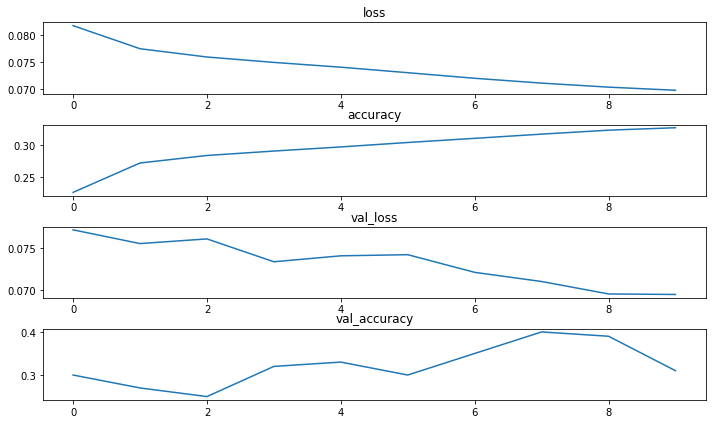

In [20]:
hist = history.history 
fig, axes = plt.subplots(len(hist), 1)
for el, ax in zip(hist, axes): 
    ax.plot(hist[el])
    ax.set_title(el)
    
fig.set_figheight(6)
fig.set_figwidth(10)
fig.tight_layout(h_pad=-0.2)
plt.show()    

In [21]:
from evaluate_NN import TestNN 
test = TestNN(NN_model, model, data_model)

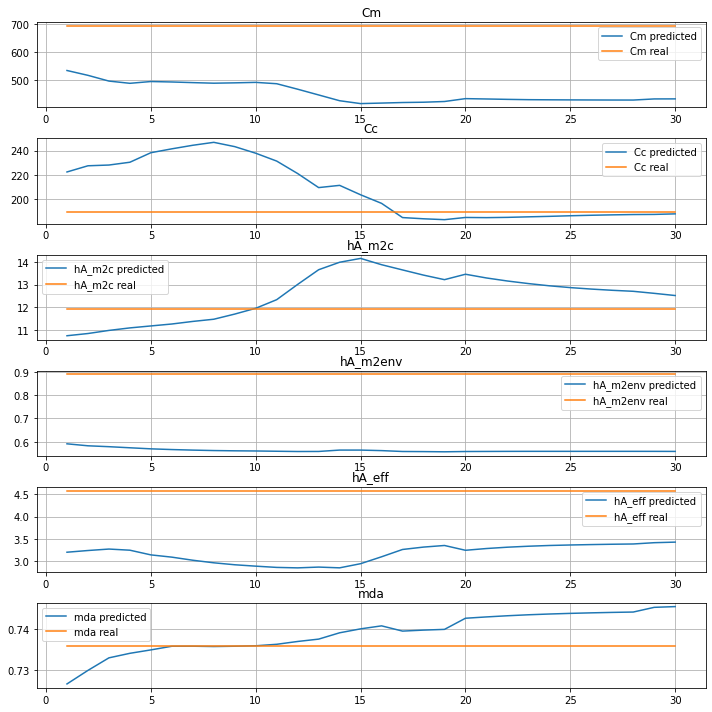

In [24]:
y_NN, y_pred = test.find_theta_one()
fig, axes = plt.subplots(len(y_NN[0]))
names = ["Cm", "Cc", "hA_m2c", "hA_m2env", "hA_eff", "mda"]
n_steps = np.linspace(1, len(y_pred), len(y_pred))
for ax, name, th_pred, th_real in zip(axes, names, y_pred.T, y_NN.T):
    ax.set_title(name)
    ax.plot(n_steps, th_pred, label=name+" predicted")
    ax.plot(n_steps, th_real, label=name+" real")
    ax.legend() 
    ax.grid()
    
fig.set_figwidth(10)
fig.set_figheight(10)
fig.tight_layout(h_pad=-0.2)

In [25]:
y_full, theta_data = test.find_theta_N(100)

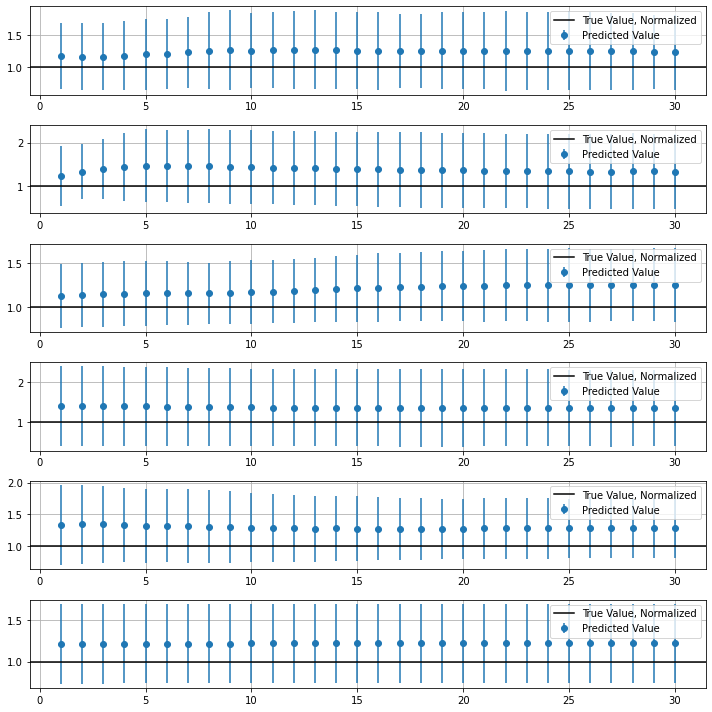

In [27]:
fig, axes = plt.subplots(6,1)
x = np.linspace(1, len(theta_data[0,0,:]), len(theta_data[0,0,:]))
for theta, ax in zip(theta_data, axes): 
    ax.errorbar(x, theta[0], yerr=theta[1], fmt='o', label="Predicted Value")
    ax.axhline(1, color='k', label="True Value, Normalized")
    ax.grid()
    ax.legend()
fig.set_figheight(10)
fig.set_figwidth(10)
fig.tight_layout()
plt.show()

In [43]:
t1

array([[[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0

In [28]:
y_NN[0:2]

array([[376.48319923,  98.94443361,  11.46660725,   0.50785744,
          1.51136402,   0.77795633],
       [376.48319923,  98.94443361,  11.46660725,   0.50785744,
          1.51136402,   0.77795633]])

In [26]:
t1/t2

array([[1.00170424, 1.59876722, 1.19633288, 1.0976036 , 2.25947618,
        0.89559604],
       [1.06745266, 1.79256721, 1.15602834, 1.10496943, 2.19302342,
        0.91269418]])

In [50]:
test.find_theta_one()[0][0]

array([5.51412491e+02, 4.33936582e+01, 1.38455450e+01, 1.53867047e-01,
       4.27189431e+00, 1.09205963e+00])